<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">MonteCarlo</span> by <span property="cc:attributionName">Manuel Cotelo Ferreiro (Universidad Politécnica de Madrid)</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p>

# Referencias



*   Monte Carlo Methods, M. H. Khalos et al.
*   Exploring the Monte Carlo method, W. Dunn et al.
*   Monte Carlo particle transport methods: neutron and photon calculations, I. Lux et al.
*   Neutronics (A Nuclear Energy Division Monograph), CEA



# Antes de empezar

In [1]:
# python default modules
import os
import sys
import itertools

from argparse import Namespace as NS

import numpy as np

import scipy.stats

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import collections  as mc
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Introducción

Los métodos de Monte Carlo son una amplia familia de algoritmos computacionales que se basan en el muestreo aleatorio para obtener resultados numéricos. El concepto subyacente es el uso de la alkeatoriedad para resolver problemas que en principio son deterministas. Esta clase de métodos son ampliamente usados en el campo de la física y las matemáticas y encontramos su mayor utilidad aplicado a problemas cuya resolución con otros medios es muiy difícil o incluso imposible. Los métodos de Monte Carlo se utilizan principalmente en estas tres clases de problemas: optimización, integraciónm numérica y muestreado de distribuciones de probabilidad.

En el campo de la física, los métodos de Monte Carlo se aplican a la simulación de sistemas con muchos grados de libertad acoplados, como la mecánica de fluidos, materiales desordenados, sólidos altamente correlacionados, estructuras celulares, sistemas de particulas que interaccionan, procesos de McKean-Vlasov o modelos cinéticos de transporte de partículas.

En principio, el método de Monte Carlo puede usarse para resolver cualquier problema que tenga una interpretación probabilística. Según la ley de los grandes números, integrales que describan el valor esperado de alguna variable aleatoria pueden ser aproximadas tomando la media empirica (también conocida como la media de la muestra) de muestras independientes de la variable. Cuando la distribución de probabilidad de la variable está parametrizada, desde un pundo de vista matemático se utiliza un muestreador de Monte Carlo de cadena de Markov (Markov chain Monte Carlo sampler, MCMC).

La idea central está en el diseño de un modelo de cadena de Markov con una distribución de probabilidad estacionaria dada. Esto es, en el límite, las muestras generadas por el método MCMC serán muestras de la distribución objetivo. Según el teorema ergódico, la distribución estacionaria será aproximada por las medidas empiricas de los estados aleatorios del muestreador MCMC.

En otros problemas, el objetivo es generar muestras a partir de una secuencia de distribuciones de probabilidad que satisfagan una ecuación de evolución no lineal. Estos flujos de distribuciones de probabilidad siempre pueden interpretarse como las distribuciones de los estados aleatorios de un proceso de Markov cuyas probabilidades de transición dependen de las distribuciones de los estados aleatorios actuales. En otros casos, se nos proporciona un flujo de distribuciones de probabilidad con un nivel creciente de complejidad de muestreo. Estos modelos también pueden verse como la evolución de la ley de los estados aleatorios de una cadena de Markov no lineal. Una forma natural de simular estos sofisticados procesos no lineales de Markov es muestrear múltiples copias del proceso, reemplazando en la ecuación de evolución las distribuciones desconocidas de los estados aleatorios por las medidas empíricas muestreadas. A diferencia de las metodologías tradicionales de Monte Carlo y MCMC, estas técnicas de partículas de campo medio se basan en muestras secuenciales que interactúan. La terminología del campo medio refleja el hecho de que cada una de las muestras (también conocidas como partículas, individuos, caminantes, agentes, criaturas o fenotipos) interactúa con las medidas empíricas del proceso. Cuando el tamaño del sistema tiende al infinito, estas medidas empíricas aleatorias convergen a la distribución determinista de los estados aleatorios de la cadena de Markov no lineal, de modo que la interacción estadística entre partículas desaparece.

## Elementos de una simulación de Monte Carlo



*   Definición del dominio
*   Definición del proceso unitario
*   Muestreado de las condiciones iniciales del proceso
*   Definición de condición de exito o de variables a integrar


## Pasos de una simulación de Monte Carlo

1.   Generación de muestras aleatorias del proceso como condiciones iniciales
2.   Simulación del proceso (transporte de partículas) dentro del dominio
3.   Análisis de la muestra de salida y estimación de distribuciones

# Ejemplos

## Fiesta de cumpleaños


Se trata de calcular la probabilidad $P_{C}$ de que en un grupo de $n$ personas al menos haya una coincidencia en el día del cumpleaños ($m = 365$ días al año). Este problema tiene solución analítica sencilla que es la siguiente:

\begin{align}
  P_{C} &= 1 - P_{NC} \\
  &= \frac{m \cdot \left(m-1\right) \cdot ... \cdot \left(m - \left(n-1\right)\right)}{m^{n}} \\
  & = \frac{m!}{ (m-n)! \cdot m^{n}}
\end{align}

donde $P_{NC}$ es la probabilidad de ninguna coincidencia.

Hasta aquí parece que está todo bien y es sencillo, pero vamos a incluir otras consideraciones como la capacidad de clacularlo. Si $m=365$ y el número de personas es $n=25$ (número típico de alumnos en un aula de colegio), ¿ es posible calcular con un ordenador o calculadora el valor de $m^{n}$?

 \begin{align}
   365^{25} = (3.65 \cdot 10^{2})^{25} = 3.65^{25} \cdot 10^{50}
 \end{align}

Vamos a intentarlo...

In [2]:
# parametros
n = 25
m = 365

In [3]:
# calculo "exacto"

mf1 = np.math.factorial(m)
print( f'# m! = {mf1}')
mf2 = np.math.factorial(m-n)
print( f'# (m-n)! = {mf2}')

try:
  fa = mf1/mf2
  print( f'# fa = {fa}')
except:
  pass

try:
  fb = float(mf1)/float(mf2)
  print( f'# fb = {fb}')
except:
  pass

mn1 = np.power(m,n)
print( f'# mn1 = {mn1}')
mn2 = np.power(float(m),float(n))
print( f'# mn2 = {mn2}')

pnc = fa/mn2
pc = 1. - pnc

print( f'# pc = {pc}')

# m! = 25104128675558732292929443748812027705165520269876079766872595193901106138220937419666018009000254169376172314360982328660708071123369979853445367910653872383599704355532740937678091491429440864316046925074510134847025546014098005907965541041195496105311886173373435145517193282760847755882291690213539123479186274701519396808504940722607033001246328398800550487427999876690416973437861078185344667966871511049653888130136836199010529180056125844549488648617682915826347564148990984138067809999604687488146734837340699359838791124995957584538873616661533093253551256845056046388738129702951381151861413688922986510005440943943014699244112555755279140760492764253740250410391056421979003289600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
# (m-n)! = 5100864472103711080930193283927293363034467198288537603946858243798113070849885229213136372954649899020351011761059778806133788936493577434500361683415188982472401346338884861141422740713138880590833811

In [4]:
# calculo "exacto" (usando precisión extendida)

# load module for floating-point arithmetic with arbitrary precision.
from mpmath import mp

mp.dps = 200 # set precision to 200 bits
mp.pretty = True

mf1 = mp.factorial(m)
mf2 = mp.factorial(m-n)
print( f'# m! = {mf1}')
print( f'# (m-n)! = {mf2}')

f = mf1/mf2
print( f'# f = {f}')

mn = mp.power(m,n)
print( f'# mn = {mn}')

pnc = f/mn
pc = 1. - pnc

print( f'# pc = {pc}')

# m! = 2.5104128675558732292929443748812027705165520269876079766872595193901106138220937419666018009000254169376172314360982328660708071123369979853445367910653872383599704355532740937678091491429440864316047e+778
# (m-n)! = 5.1008644721037110809301932839272933630344671982885376039468582437981130708498852292131363729546498990203510117610597788061337889364935774345003616834151889824724013463388848611414227407131388805908338e+714
# f = 4921543948648615193038527019122032412846804592445950918656000000.0
# mn = 11410944981823451546774580833569544217039269564449787139892578125.0
# pc = 0.56869970396946388561788409084722390123865271939770181547298188824517723623118701816068834864021181031165362084601190296950040709635040229457228133474935042432785586295047944911882950749971246069813146


In [5]:
# cálculo aproximado con MC

# accumulation
def check_coincidence(xs):
  ans = np.array( [ xi.size != np.unique(xi).size for xi in xs ], dtype=bool, )
  return ans[ ans == True ].size

num_samples_accum = 0
num_success_accum = 0

num_samples_per_cycle = 100000
num_cycles = 20
for i in range(num_cycles):

  # sample generation
  samples = np.random.randint( low=0, high=m, size=( num_samples_per_cycle, n, ), )

  num_samples_accum += num_samples_per_cycle
  num_success_accum += check_coincidence(samples)

  f = num_success_accum / num_samples_accum

  print( f'{i:6d} {num_success_accum:12d} {num_samples_accum:12d} {f:15.7e}')

print( f'# num_samples_accum = {num_samples_accum}')
print( f'# num_success_accum = {num_success_accum}')
print( f'# P = {num_success_accum/num_samples_accum:15.7e}')

     0        57021       100000   5.7021000e-01
     1       113806       200000   5.6903000e-01
     2       170689       300000   5.6896333e-01
     3       227887       400000   5.6971750e-01
     4       284902       500000   5.6980400e-01
     5       342127       600000   5.7021167e-01
     6       398920       700000   5.6988571e-01
     7       455792       800000   5.6974000e-01
     8       512700       900000   5.6966667e-01
     9       569603      1000000   5.6960300e-01
    10       626520      1100000   5.6956364e-01
    11       683527      1200000   5.6960583e-01
    12       740330      1300000   5.6948462e-01
    13       797026      1400000   5.6930429e-01
    14       853808      1500000   5.6920533e-01
    15       910561      1600000   5.6910063e-01
    16       967558      1700000   5.6915176e-01
    17      1024291      1800000   5.6905056e-01
    18      1080993      1900000   5.6894368e-01
    19      1137633      2000000   5.6881650e-01
# num_samples_accum 

En este caso, el cálculo directo y el cálculo por Monte Carlo convergen al mismo valor. Pero existen casos en que el cálculo directo no es viable debido a las necesidades de precisión de los cálculos analíticos. En este caso, la técnica de Monte Carlo nos permite obtener los resultados correctos evitando problemas de precisión.

## Disparar al pato

Tenemos $n$ cazadores que disparan a $m$ patos, de forma que cada cazador elige aleatoriamente de manera equiprobable el pato al que dispara. ¿ Cuál es la distribución del número de patos supervivientes?

Para simular el disparo realizaremos muestras de un vector de $n$ valores en que cada elemento será un numero de $1$ a $m$ indicando el pato al que han disparado. Supondremos que si un cazador dispara a un pato lo mata, por lo que la probabilidad de éxito de un disparo concreto es $P=1$.

In [9]:
# parámetros

def check_hits( xs, m, ):
  ans = np.array( [ np.unique(xi).size for xi in xs ], dtype=int, )
  return np.array( [ ans[ ans==i ].size for i in range(m) ], dtype=int, )

n = 10 # number of shooters
m = 10 # number of targets

num_samples_accum = 0
num_success_accum = np.zeros( ( m, ), dtype=int, )

num_samples_per_cycle = 10000
num_cycles = 20
for cycle in range(num_cycles):

  # sample generation
  samples = np.random.randint( low=0, high=m, size=( num_samples_per_cycle, n, ), )

  num_samples_accum += n * num_samples_per_cycle
  num_success_accum += check_hits(samples,m)

  ws = num_success_accum
  s = ' '.join( [ f'{wi:8d}' for wi in ws ] )

  print( f'{cycle:4d} {s}' )

ws = num_success_accum / num_samples_accum
print( ' '.join( [ f'{wi:15.7e}' for wi in ws ]), )

   0        0        0        0        5      149     1283     3538     3562     1325      136
   1        0        0        0       15      328     2566     7057     7063     2643      323
   2        0        0        0       24      489     3803    10595    10589     4018      474
   3        0        0        0       31      643     5064    14013    14220     5380      636
   4        0        0        0       39      820     6339    17501    17740     6756      787
   5        0        0        0       44      989     7674    20913    21292     8138      929
   6        0        0        0       51     1169     8964    24327    24922     9466     1077
   7        0        0        0       57     1326    10254    27794    28533    10778     1231
   8        0        0        0       66     1517    11533    31300    32033    12116     1407
   9        0        0        0       77     1689    12861    34724    35622    13433     1564
  10        0        0        0       85     1870 

Como vemos no hay sucessos con 1, 2 o 3 patos muertos. Puede parecer a primera vista que se trata de sucesos imposibles ya que no aparecen pero esto no es cierto. Se trata de sucesos tan poco probables que necesitariamos una muestra increiblemente grande para que apareciesen. Por lo tanto, con Monte Carlo no podemos decir que un suceso sea imposible, solo que en nuestra muestra no aparece. Esto es un problema en Monte Carlo cuando lo que queremos es estudiar efectos secundarios de baja probabilidad que aparecen a partir de un suceso primario ya que necesitamos una enorme cantidad de muestras, muchas de las cuales descartamos porque no dan lugar al efecto bajo estudio.

El número de posibles resultados de este experimento es $m^{n}$, pero el número de resultados con solo un pato muerto son $m$, por lo que la  probabilidad de matar a un único pato es $P = \frac{m}{m^{n}} = 10^{-9}$. En definitiva este suceso es extremadamente raro y muy posiblemente nunca aparezca en un muestreo como el que hemos realizado con Monte Carlo.

La distribución analítica de probabilidades para $k$ patos muertos es:

\begin{align}
\end{align}

In [19]:
for k, wi in enumerate(ws):
  qi = 0.
  res = 0.
  print( f'{k+1:3d} {wi:15.7e} {qi:15.7e} {res:15.7e}', )

  1   0.0000000e+00   0.0000000e+00   0.0000000e+00
  2   0.0000000e+00   0.0000000e+00   0.0000000e+00
  3   0.0000000e+00   0.0000000e+00   0.0000000e+00
  4   7.6500000e-05   0.0000000e+00   0.0000000e+00
  5   1.6900000e-03   0.0000000e+00   0.0000000e+00
  6   1.2917000e-02   0.0000000e+00   0.0000000e+00
  7   3.4682000e-02   0.0000000e+00   0.0000000e+00
  8   3.5530500e-02   0.0000000e+00   0.0000000e+00
  9   1.3462000e-02   0.0000000e+00   0.0000000e+00
 10   1.6040000e-03   0.0000000e+00   0.0000000e+00


## Cálculo de $\pi$

Vamos a estimar el valor del número $\pi$ mediante cálculo de Monte Carlo a partid de muestrear los puntos en el interior de un cuadrilátero con un cuadrante de circunferencia embebido.

Primero vamos a dibujar el sistema que vamos a muestrear.

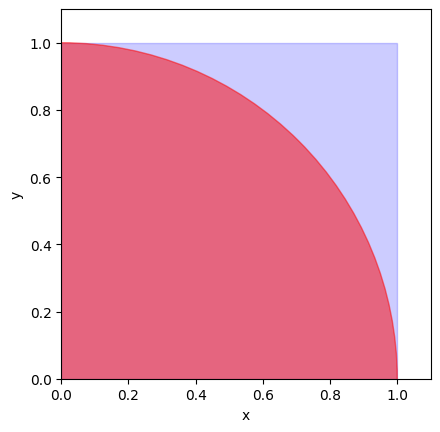

In [ ]:
fig, ax = plt.subplots( 1, 1, )

ax.set_xlabel('x')
ax.set_ylabel('y')

ref = 0.
length = 1.

lo = ref
hi = ref + length
delta = .1*length

ax.set_xlim(lo,hi+delta)
ax.set_ylim(lo,hi+delta)

ax.set_aspect('equal', adjustable='box')

# create a square
rect = patches.Rectangle((lo,lo), length, length, linewidth=1, edgecolor='blue', facecolor='blue', alpha=0.2)
ax.add_patch(rect)

# create a circle
circ = patches.Circle( (lo,lo), length, edgecolor='red', facecolor='red', alpha=0.5, )
ax.add_patch(circ)

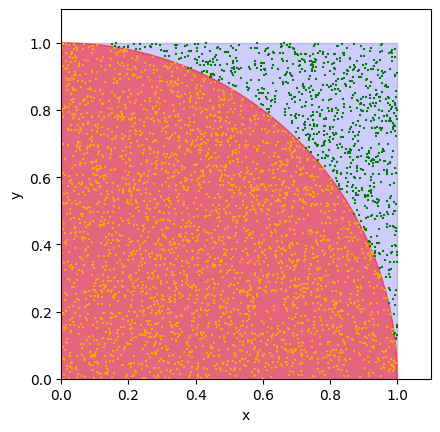

In [ ]:
# sampling example

ref = 0.
length = 1.

lo = ref
hi = ref + length
delta = .1*length

num_samples = 4000
xs = np.random.random_sample(size=(num_samples,2))

# get points inside/outside the circle
xs_in  = xs[ np.linalg.norm( xs, axis=-1, ) <= length ]
xs_out = xs[ np.linalg.norm( xs, axis=-1, ) > length ]

# plot results
fig, ax = plt.subplots( 1, 1, )

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(lo,hi+delta)
ax.set_ylim(lo,hi+delta)

ax.set_aspect('equal', adjustable='box')

# create a square
rect = patches.Rectangle((lo,lo), length, length, linewidth=1, edgecolor='blue', facecolor='blue', alpha=0.2)
ax.add_patch(rect)

# create a circle
circ = patches.Circle( (lo,lo), length, edgecolor='red', facecolor='red', alpha=0.5, )
ax.add_patch(circ)

# plot points
ax.scatter(xs_in[:,0],xs_in[:,1],marker='+',color='orange', s=4., )
ax.scatter(xs_out[:,0],xs_out[:,1],marker='+',color='green', s=4., )

In [ ]:
# monte carlo calculation (almots done in previous block)

ref = 0.
length = 1.

lo = ref
hi = ref + length
delta = .1*length

num_samples_per_cycle = 100000
num_cycles = 10

num_samples_accum = 0
num_success_accum = 0

for cycle in range(num_cycles):

  # generate sampling
  xs = np.random.random_sample(size=(num_samples_per_cycle,2))

  # get points inside/outside the circle
  xs_in = xs[ np.linalg.norm( xs, axis=-1, ) <= length ]

  # accumulation
  num_samples_accum += num_samples_per_cycle
  num_success_accum += xs_in.size
  f = num_success_accum / num_samples_accum

  pi_estim = 2. * f
  res = np.abs(1. - pi_estim/np.pi)

  print( f'{cycle:4d} {num_success_accum:12d} {num_samples_accum:12d} {pi_estim:17.5e} {res:17.5e}')

   0       157168       100000       3.14336e+00       5.62564e-04
   1       314094       200000       3.14094e+00       2.07746e-04
   2       471486       300000       3.14324e+00       5.24367e-04
   3       628734       400000       3.14367e+00       6.61240e-04
   4       786236       500000       3.14494e+00       1.06677e-03
   5       943588       600000       3.14529e+00       1.17796e-03
   6      1100582       700000       3.14452e+00       9.31803e-04
   7      1257476       800000       3.14369e+00       6.67606e-04
   8      1414306       900000       3.14290e+00       4.16849e-04
   9      1571862      1000000       3.14372e+00       6.78429e-04


## Problema de la aguja de Buffon


Se trata de lanzar una aguja sobre un papel en el que se han trazado rectas paralelas distanciadas entre sí de manera uniforme. Se puede demostrar que si la distancia entre las rectas es igual a la longitud de la aguja, la probabilidad de que la aguja cruce alguna de las líneas es
$2/\pi$.

Ref: [Aguja de Buffon](https://es.wikipedia.org/wiki/Aguja_de_Buffon)

Primero vamos a dibujar el problema.

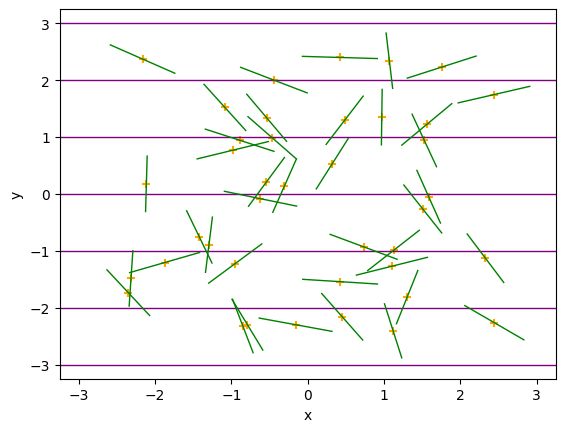

In [ ]:
# parameters for random sampling

length = 5.

ref = np.array([ -.5*length, -.5*length, 0., ])
delta = np.array([ length, length, np.pi, ])

# generate sample
num_samples = 40
samples = ref[None,:] + delta[None,:] * np.random.random_sample( size=( num_samples, 3, ), )

# coordinates of the center of the needle and angle of the needl
xs, phi = samples[:,0:2], samples[:,2]

# plot
fig, ax = plt.subplots( 1, 1, )

ax.set_xlabel('x')
ax.set_ylabel('y')

lo = 2 * [ -.5 * length - .75, ]
hi = 2 * [  .5 * length + .75, ]
ax.set_xlim(lo[0],hi[0])
ax.set_ylim(lo[1],hi[1])

# plot lines
ilo, ihi = int(np.floor(lo[1])), int(np.ceil(hi[1]))
lines = [ [ ( lo[0], i, ), ( hi[0], i, ), ] for i in range(ilo,ihi+1) ]
lc = mc.LineCollection( lines, color='purple', linewidths=1., )
ax.add_collection(lc)

# plot needles
def make_needle( xc, yc, phi, l, ):
  dx = l * np.cos(phi) / 2.
  dy = l * np.sin(phi) / 2.
  return [ ( xc+dx, yc+dy, ), ( xc-dx, yc-dy, ), ]

needles = [ make_needle(si[0],si[1],si[2],1.) for si in samples ]
lc = mc.LineCollection( needles, color='green', linewidths=1., )
ax.add_collection(lc)

# plot center of needle
ax.scatter( xs[:,0], xs[:,1], marker='+', color='orange', )


A continuación vamos a resolver el problema mediante un método de Monte Carlo. Por simplicidad establecemos la distancia entre rectas como $L = 1$, que será la misma que la distancia de la aguja. Planteamos un sistema de coordinadas XY en las que usaremos rectas paralelas al eje x distanciadas entre sí una distancia $L$. El sistema es invariable a lo largo del eje X y periódico respecto al eje Y, por lo que podemos restringir nuestro espacio de muestreo a $x = 0$ y entre $y_{lo} = 0$ y $y_{hi} = 0.5$. Para el lanzamiento de la aguja muestrearé la posición de su centro y el ángulo respecto al eje X.

In [ ]:
# define success criteria
def hit(xs):
  delta = np.abs(.5*np.sin(xs[1]))
  return (xs[0] - delta) <= 0.

def count_hits(xs):
  ans = np.array([ hit(xi) for xi in xs], dtype=bool, )
  return ans[ ans == True ].size

# parameters for random sampling
ref = np.array([ 0., 0., ])
delta = np.array([ .5, np.pi, ])

# parameters for the size of the sample
num_samples_per_cycle = 100000
num_cycles = 10

num_samples_accum = 0
num_success_accum = 0

for cycle in range(num_cycles):

  # generate sample
  samples = ref[None,:] + delta[None,:] * np.random.random_sample( size=( num_samples_per_cycle, 2, ), )

  # accumulation
  num_samples_accum += num_samples_per_cycle
  num_success_accum += count_hits(samples)
  f = num_success_accum / num_samples_accum
  pi_estim = 2. / f

  res = np.abs(1. - pi_estim/np.pi)

  print( f'{cycle:4d} {num_success_accum:12d} {num_samples_accum:12d} {pi_estim:15.7e} {res:15.7e}')




   0        63770       100000   3.1362710e+00   1.6939433e-03
   1       127064       200000   3.1480199e+00   2.0458546e-03
   2       190798       300000   3.1446871e+00   9.8497736e-04
   3       254222       400000   3.1468559e+00   1.6753426e-03
   4       317935       500000   3.1452970e+00   1.1791284e-03
   5       381782       600000   3.1431550e+00   4.9730847e-04
   6       445440       700000   3.1429598e+00   4.3516671e-04
   7       509334       800000   3.1413571e+00   7.4964770e-05
   8       572660       900000   3.1432263e+00   5.2002083e-04
   9       635913      1000000   3.1450843e+00   1.1114293e-03


## El borracho se cae al agua

En este es un ejemplo de un problema en 2D que se resolverá con un Random Walk.
Un RW es un proceso aleatorio que describe un camino que consiste en una sucesión de pasos aleatorios en un determinado espacio matemático. En este caso lo realizaremos de manera muy sencilla con pasos definidos en direcciones determinadas, pero es suficientemente ilustrativo para entender la idea.

Hemos viajado a una ciudad por trabajo en la que las calles son perfectamente ortogonales, como si estuvieramos en el centro de New York. Después de un duro día de trabajo, nos hemos enredado en un bar y hemos bebido más de la cuenta. Cuando salimos del bar para volver al hotel, nos damos cuenta de que vamos completamente borrachos y vamos tomando calles de manera aleatoria mientras creemos que nos dirigimos al hotel.

Podemos plantearnos varias cuestiones llegados a este momento como por ejemplo, ¿ partiendo de una posición inicial (el bar) y conociendo otra posición objetivo (el hotel), cual es la probabilidad de que llegue sin salirme de la ciudad (dominio del problema)? Este problema se deja a la resolución de los alumnos, aquí resolveremos el siguiente. Y es que la ciudad a la que hemos ido por trabajo es Amsterdam, con sus precioso canales, pero que por desgracia para nosotros no tienen ningún tipo de vallado o cercado y tan bortrachos como vamos, el peligro de caer en el canal accidentalmente empieza a ser preocupante. ¿ Qué probabilidad tengo de caerme al canal?

Esta historia nos sirve para plantear una respuesta a este problema utilizando métodos de Monte Carlo basados en RW. Nos vamos a basar en un dominio que mapearemos con nodos uniformemente distribuidos, que serán los cruces entre calles. Los segmentos que unen nodos contiguos serán las calles por las que vamos a ir "dando tumbos borrachos". Por tanto, en cada paso del RW tendremos unas coordenadas $(i,j)$ que nos indicarán nuestra posición en la ciudad. Modelaremos el canal como una de las fronteras de nuestro dominio, así que cuando el RW llegue a un nodo de dicha frontera consideraremos que nos hemos caido al canal. Si el RW sale por cualquier otra frontera consideraremos que no hemos caido en el canal.

In [ ]:
# design of the process

# Random Walk stepper
rng = np.random.Generator(np.random.PCG64())

list_step = np.array( [
  [  1,  0, ],
  [ -1,  0, ],
  [  0,  1, ],
  [  0, -1, ],
], dtype=int, )

def stepper( gen, ls, ks, ):
  return ks + gen.choice( ls, 1, replace=False, )[0]

next_step = lambda ks: stepper(rng,list_step,ks)

# initialize plot
fig, axs = plt.subplots( 1, num_cycles, figsize=(10,8))

for ax in axs:
  ax.set_xlim(-6,6)
  ax.set_ylim(-6,6)
  ax.set_aspect('equal')

# number of walks
num_cycles = 5
# steps per walk
num_steps = 20

# do random walk
for cycle in range(num_cycles):

  ks = [ np.array( [ 0, 0, ], dtype=int, ), ]
  for step in range(num_steps):
    ks.append(next_step(ks[-1]))
  ks = np.array(ks)

  axs[cycle].plot( ks[:,0], ks[:,1], )

In [ ]:
# domain
num_nodes = 11
domain = NS(

  nx = num_nodes,
  ny = num_nodes,

  lo = np.array( [ 0, 0, ], dtype=int, ),
  hi = np.array( [ num_nodes-1, num_nodes-1, ], dtype=int, ),

)

# status of the Random Walk
status = NS(
  cont = 0, # continue with the random walk
  kill = 1, # stop the random walk, no success
  success = 2, # stop random walk, success
)

def check_hit_border(domain,ks):
  if ks[0] == domain.lo[0]:
    return status.success
  elif ks[0] == domain.hi[0] or ks[1] == domain.lo[1] or ks[1] == domain.hi[1]:
    return status.kill
  return status.cont

hit_border = lambda ks: check_hit_border(domain,ks)

# Random Walk stepper
rng = np.random.Generator(np.random.PCG64())

list_step = np.array( [
  [  1,  0, ],
  [ -1,  0, ],
  [  0,  1, ],
  [  0, -1, ],
], dtype=int, )

def stepper( gen, ls, ks, ):
  return ks + gen.choice( ls, 1, replace=False, )[0]

next_step = lambda ks: stepper(rng,list_step,ks)

# define initial position: center of the domain
ks_init = np.array( [ domain.nx // 2, domain.ny // 2, ], dtype=int, )

# do Random Walk
num_cycles = 1000
cycle_inc = num_cycles // 15

num_samples_accum = 0
num_success_accum = 0

for cycle in range(num_cycles):

  # some message
  if cycle % cycle_inc == 0:
    print( f'# cycle {cycle:6d} of {num_cycles:6d} ({100.*cycle/num_cycles:5.1f} %)', file=sys.stdout, )
    sys.stdout.flush()

  ks = np.copy(ks_init)
  stat = hit_border(ks)

  while stat == status.cont:
    ks = next_step(ks)
    stat = hit_border(ks)

  num_samples_accum += 1
  if stat == status.success:
    num_success_accum += 1

f = num_success_accum / num_samples_accum

print()
print( f'# num_samples_accum = {num_samples_accum}')
print( f'# num_success_accum = {num_success_accum}')
print( f'# P = {f:15.7e}')
print( f'# res = {1. - f/.25:15.7e}')

# cycle      0 of   1000 (  0.0 %)
# cycle     66 of   1000 (  6.6 %)
# cycle    132 of   1000 ( 13.2 %)
# cycle    198 of   1000 ( 19.8 %)
# cycle    264 of   1000 ( 26.4 %)
# cycle    330 of   1000 ( 33.0 %)
# cycle    396 of   1000 ( 39.6 %)
# cycle    462 of   1000 ( 46.2 %)
# cycle    528 of   1000 ( 52.8 %)
# cycle    594 of   1000 ( 59.4 %)
# cycle    660 of   1000 ( 66.0 %)
# cycle    726 of   1000 ( 72.6 %)
# cycle    792 of   1000 ( 79.2 %)
# cycle    858 of   1000 ( 85.8 %)
# cycle    924 of   1000 ( 92.4 %)
# cycle    990 of   1000 ( 99.0 %)

# num_samples_accum = 1000
# num_success_accum = 250
# P =   2.5000000e-01
# res =   0.0000000e+00


In [ ]:
# a different random walk

num_cycles = 5

fig, axs = plt.subplots( 1, num_cycles, figsize=(10,8))

for ax in axs:
  ax.set_xlim(-10,10)
  ax.set_ylim(-10,10)
  ax.set_aspect('equal')

for cycle in range(num_cycles):

  lam = 1./(cycle + 1.)

  func_length = scipy.stats.expon( loc=0., scale=lam, )
  func_angle = scipy.stats.uniform( loc=0., scale=2.*np.pi, )

  # create steps
  num_steps = 100 * (cycle + 1)

  dl = func_length.rvs(size=num_steps)
  ang = func_angle.rvs(size=num_steps)

  xs = np.zeros( ( num_steps+1, 2, ), )
  xs[1:,0] = dl * np.cos(ang)
  xs[1:,1] = dl * np.sin(ang)

  xs = np.cumsum( xs, axis=0, )

  axs[cycle].set_title(f'$\lambda = {lam:6.3f}$')
  axs[cycle].plot( xs[:,0], xs[:,1], )

# Probabilidad

## Suma de variables aleatorias: cuadratura de Monte Carlo

Supongamos que tenemos las variables aleatorias $X_{1},X_{2}, ... , X_{i} , ... , X_{N}$ que se muestrean de manera aleatoria, aunque no necesariamente de manera independiente, con la función de distribución $f(x)$. Definamos también las funciones $g_{i}$ (posiblemente diferentes entre sí) de las correspondientes variables $X_{i}$ y los coeficientes reales $\lambda_{i}$. Entonces definimos la función $G$

\begin{align}
  G \equiv \sum_{i=1}^{N} \lambda_{i} g_{i}(X_{i})
\end{align}

La esperanza (que es una operación lineal) de la función $G$ será

\begin{align}
  E(G) = \langle G \rangle & = E \left( \sum_{i=1}^{N} \lambda_{i} g_{i}(X_{i}) \right) \\
  & = \sum_{i=1}^{N} \lambda_{i} \langle g_{i}(X) \rangle
\end{align}

Si todas las $X_{i}$ son independientes, entonces la varianza de $G$ será

\begin{align}
var \left\{ G \right\} & = \langle G^{2} \rangle - \langle G \rangle^{2}
\end{align}

y se convierte en

\begin{align}
var \left\{ G \right\} & = \sum_{i=1}^{N} \lambda_{i}^{2} var \left\{ g_{i}(X) \right\}
\end{align}

Consideremos $\lambda_{i} = 1/N$ y todas las funciones $g_{i}(x)$ identicas e iguales a $g(x)$. Entonces el valor esperado se convierte en

\begin{align}
E(G) & = E \left( \sum_{i=1}^{N} \lambda_{i} g(X_{i}) \right) \\
  & = \frac{1}{N} \sum_{i=1}^{N} \langle g(X) \rangle
\end{align}

La función $G$ , que es la media aritmética de la función $g(x)$, tiene el mismo valoir medio que la función $g(x)$ en si misma. Entonces decimos que $G$ es un **estimador** de $\langle g(X) \rangle$. De manera más general una expresión $G$ es un estimador de una magnitud, como por ejemplo $\int g(x) f(x) dx$.

La varianza entonces se convierte en

\begin{align}
  var \left\{ G \right\} & = var \left\{  \frac{1}{N} \sum_{i=1}^{N} g(X_{i})\right\} = \sum \frac{1}{N^{2}} var \left\{ g(X) \right\} \\
   & = \frac{1}{N} var \left\{ g(X) \right\}
\end{align}

Por lo tanto, cuando N, el número de muestras de $X$, aumenta, la varianza del valor medio de $G$ disminuye como $\frac{1}{N}$. Este resultado nos dirige hacia la idea principal de la evaluación de integrales mediante el método de Monte Carlo: la integral puede estimarse mediante una suma

\begin{align}
\langle g(X) \rangle = \int_{-\infty}^{\infty} g(x) f(x) dx = E(\frac{1}{N} \sum_{i=1}^{N} g(X_{i}) )
\end{align}

## Teorema Fundamental

## Integración de Monte Carlo

## Estimadores de Monte Carlo

# Muestreo de variables aleatorias

## Uso de diferentes generadores de números aleatorios

Recuperamos el cálculo de $\pi$ pero usando diferentes generadores de nñumeros aleatorios disponibles desde el modulo numpy de python.

In [ ]:
# pi calculation a circle inside a square

num_samples_per_cycle = 100000
num_cycles = 20

# define random generator
seed = np.random.SeedSequence(13243546576879)
g1 = np.random.MT19937(seed)
g2 = np.random.PCG64(seed)
g3 = np.random.PCG64DXSM(seed)
g4 = np.random.Philox(seed)
g5 = np.random.SFC64(seed)

gs = [ np.random.Generator(gi) for gi in [ g1, g2, g3, g4, g5, ] ]

# accumulators
num_samples_accum = 0
num_success_accum = np.zeros( ( len(gs), ), )

for cycle in range(num_cycles):

  # generate sampling
  xs = np.array( [ gi.random( size=(num_samples_per_cycle,2), ) for gi in gs ])

  # accumulation
  num_samples_accum += num_samples_per_cycle
  num_success_accum += np.array( [ xi[ np.linalg.norm(xi,axis=-1) <= 1. ].size for xi in xs ] )

  f = num_success_accum / num_samples_accum

  pi_estim = 2. * f
  res = np.abs(1. - pi_estim/np.pi)

  print( ' '.join([ f'{ri:13.5e}' for ri in res ]), )


  1.39017e-03   9.06339e-04   9.44536e-04   6.38958e-04   4.07203e-03
  6.76897e-05   2.78032e-05   1.33924e-03   3.52479e-04   9.90788e-04
  2.31264e-05   5.45155e-04   1.33075e-03   5.32680e-05   1.47462e-03
  2.02874e-04   8.69831e-04   4.00226e-04   7.21719e-04   1.92025e-03
  9.97787e-06   6.41921e-04   5.32680e-05   8.42677e-04   1.84895e-03
  2.39577e-04   4.92103e-04   8.67883e-05   6.75033e-04   1.73776e-03
  2.59585e-04   9.10756e-04   4.96302e-05   2.69719e-04   1.93117e-03
  2.87324e-04   1.03535e-03   4.00226e-04   3.68395e-04   1.71813e-03
  1.33474e-04   7.19164e-04   4.73437e-04   3.06326e-05   1.23553e-03
  3.21064e-04   7.08129e-04   1.27116e-04   3.07658e-05   1.07737e-03
  1.80545e-04   5.97242e-04   6.24810e-05   2.08372e-04   6.27336e-04
  1.41962e-04   7.08554e-04   2.27906e-04   1.29662e-04   5.04835e-04
  1.05397e-04   7.17532e-04   2.14112e-04   2.13892e-04   4.94225e-04
  5.97626e-06   4.15102e-04   2.59585e-04   2.98821e-04   2.85959e-04
  7.06606e-05   3.76

## Ejemplos

Los modulos de python **numpy.random** y **scipy.stats** incluyen gran cantidad de generadores de distribuciones de probabilidad implementadas. Vamos a probar alguna de etas distribuciones como es la lognormal.

In [ ]:
# define an random generator (this is the default)
rng = np.random.Generator(np.random.PCG64(seed))

loc = 0.
shape = .25
scale = 1.

dist = scipy.stats.lognorm( shape, scale=scale, loc=loc, )

num_samples = 400000
samples = dist.rvs( ( num_samples, ), random_state=rng, )

hs, edges = np.histogram( samples, bins=np.linspace(loc,loc+10.*shape,200), density=True, )
es = .5*(edges[1:] + edges[:-1])

# plot histogram
fig, ax = plt.subplots( 1, 1, )

ax.step( es, hs, )

xs = np.linspace(loc,loc+10.*shape,1000)
ax.plot( xs, dist.pdf(xs), alpha=.7, )

## Muestreado de una función de distribución de probabiliddad

# Integración numérica con métodos de Monte Carlo

En esta sección vamos a aplicar cuadraturas de Monte Carlo a integrales del siguiente tipo

\begin{align}
  G = \frac{\int_{\Omega_{0}} g(x) f(x) dx}{\int_{\Omega_{0}} f(x) dx}
\end{align}

donde $f(x) >= 0$. A continuación consideraremos que la función $f(x)$ está normalizada en $\Omega_{0}$, es decir, $\int_{\Omega_{0}} f(x) dx = 1$. La formulación de la ecuación es exactamente el cálculo del valor medio de la función $g(x)$ usando una función de peso $f(x)$.

Vamos a probar un caso simple.

In [ ]:
# define function to integrate
g = lambda x: 2. / np.sqrt(np.pi) * np.exp(-x*x)

# define integration domain
lo, hi = 0., 1.

# create random generator
rng = np.random.Generator(np.random.PCG64(seed))
dist = scipy.stats.uniform( loc=lo, scale=(hi-lo), )

# define size of the sample
num_samples = 1000000

# sample function
gs = g(dist.rvs(num_samples))

# integral estimation with MC
ig_estim = (hi - lo) * np.average(gs)

# integral value (well, it realies in a numerical calculation too ...)
ig_exact = scipy.special.erf(hi)

res = np.abs(1. - ig_estim/ig_exact)

print( f'# ig_estim = {ig_estim:15.7e}')
print( f'# ig_exact = {ig_exact:15.7e}')
print( f'# res = {res:15.7e}')

# ig_estim =   8.4267898e-01
# ig_exact =   8.4270079e-01
# res =   2.5886785e-05


## Quasi Monte Carlo

In numerical analysis, the quasi-Monte Carlo method is a method for numerical integration and solving some other problems using low-discrepancy sequences (also called quasi-random sequences or sub-random sequences) to achieve variance reduction. This is in contrast to the regular Monte Carlo method or Monte Carlo integration, which are based on sequences of pseudorandom numbers.

Monte Carlo and quasi-Monte Carlo methods are stated in a similar way. The problem is to approximate the integral of a function f as the average of the function evaluated at a set of points $x_{1}, ..., x_{N}$.

Since we are integrating over the s-dimensional unit cube, each xi is a vector of s elements. The difference between quasi-Monte Carlo and Monte Carlo is the way the xi are chosen. Quasi-Monte Carlo uses a low-discrepancy sequence such as the Halton sequence, the Sobol sequence, or the Faure sequence, whereas Monte Carlo uses a pseudorandom sequence. The advantage of using low-discrepancy sequences is a faster rate of convergence. Quasi-Monte Carlo has a rate of convergence close to $O(1/N)$, whereas the rate for the Monte Carlo method is $O(N^{-0.5}$).

The Quasi-Monte Carlo method recently became popular in the area of mathematical finance or computational finance. In these areas, high-dimensional numerical integrals, where the integral should be evaluated within a threshold $\epsilon$, occur frequently. Hence, the Monte Carlo method and the quasi-Monte Carlo method are beneficial in these situations.

# Random Walks, ecuaciones integrales y reducción de varianza

## Propiedades de las cadenas de Markov discretas

## Procesos de Poisson y cadenas de Markov continuas en el tiempo

## Movimiento Browniano

## Equaciones integrales: transporte de radiación y Random Walks

## Ecuación de Boltzmann

# Simulación de sistemas estocásticos: transporte de radiación

## Un borracho resuelve un problema

El problema que resolvimos de un borracho no era completamente gratuito, ya que vamos a utilizar las herramientas desarrolladas en ese ejemplo para su apolicación a la resolución de la ecuación de difusión en 2D con coeficiente de conducción contante.

\begin{align}
  \Delta \phi = 0
\end{align}

Resolveremos esta EDP en un dominio finito con condiciones de frontera de Dirichlet, es decir, el valor de $\phi$ está dado en la frontera del dominio.

In [ ]:
# domain: box [0,1]x[0,1]
num_nodes = 20
domain = NS(

  # domain limits
  lo = np.array( [ 0., 0., ], ),
  hi = np.array( [ 1., 1., ], ),

  # domain discretization
  num = np.array( 2 * [ num_nodes, ], dtype=int, ),
  ilo = np.array( [ 0, 0, ], dtype=int, ),
  ihi = np.array( [ num_nodes-1, num_nodes-1, ], dtype=int, ),

  # domain mesh
  xs = np.linspace(0.,1.,num_nodes),
  ys = np.linspace(0.,1.,num_nodes),
)

domain.mx, domain.my = np.meshgrid(domain.xs,domain.ys)

# boundary conditions
func = lambda x, y: (x + y + 1.)*(x+1)*(x+1)
bcs = NS(
  xlo = func(domain.xs    ,domain.ys[ 0]),
  xhi = func(domain.xs    ,domain.ys[-1]),
  ylo = func(domain.xs[ 0],domain.ys    ),
  yhi = func(domain.xs[-1],domain.ys    ),
)

# status of the Random Walk
status = NS(
  cont = 0, # continue with the random walk
  kill = 1, # stop the random walk, no success
)

def check_hit_border(jlo,jhi,ks):
  if ks[0] == jlo[0] or ks[0] == jhi[0] or ks[1] == jlo[1] or ks[1] == jhi[1]:
    return status.kill
  return status.cont

hit_border = lambda ks: check_hit_border(domain.ilo,domain.ihi,ks)

# Random Walk stepper
rng = np.random.Generator(np.random.PCG64())

list_step = np.array( [
  [  1,  0, ],
  [ -1,  0, ],
  [  0,  1, ],
  [  0, -1, ],
], dtype=int, )

def stepper( gen, ls, ks, ):
  return ks + gen.choice( ls, 1, replace=False, )[0]

next_step = lambda ks: stepper(rng,list_step,ks)

# initialize state
phi = np.zeros( domain.num, dtype=float, )
phi_exact = func(domain.mx,domain.my)

# copy BC's
phi[ 0, :] = bcs.xlo
phi[-1, :] = bcs.xhi
phi[ :, 0] = bcs.ylo
phi[ :,-1] = bcs.yhi

# define RW parameters
num_samples_per_node = 100

# create iterator of inner nodes
iter_inner = itertools.product(
  range(domain.ilo[0]+1,domain.ihi[0]),
  range(domain.ilo[1]+1,domain.ihi[1])
)

# do RW for each interior node
for ( i, j, ) in iter_inner:

  phi[i,j] = 0.
  wacc = 0.

  for _ in range(num_samples_per_node):

    ks = np.array( [ i, j, ], dtype=int, )
    stat = hit_border(ks)

    while stat == status.cont:
      ks = next_step(ks)
      stat = hit_border(ks)

    wacc += 1.
    phi[i,j] += phi[ks[0],ks[1]]

  phi[i,j] /= wacc

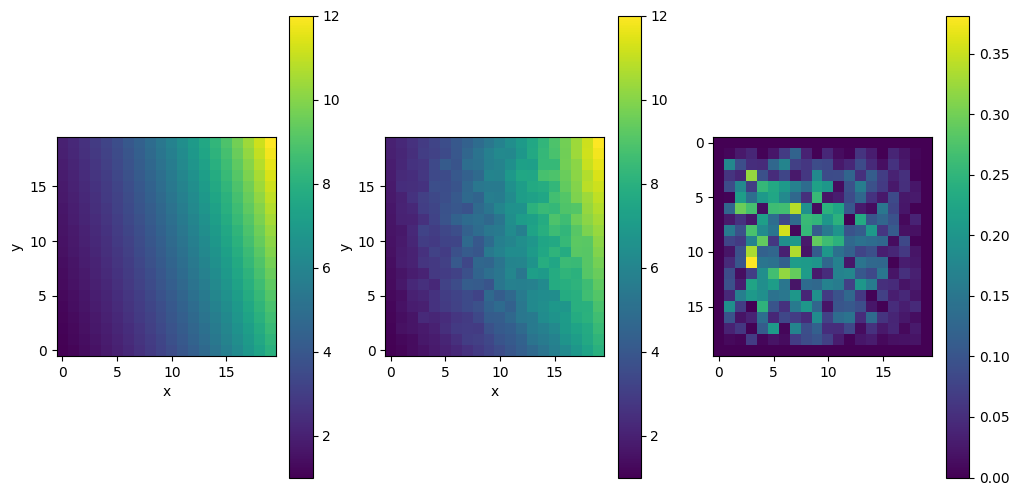

In [ ]:
# plot solution
fig, ( ax1, ax2, ax3, ) = plt.subplots( 1, 3, figsize=(12,6), )

opts = {
  'vmin': 1.,
  'vmax': 12.,
  'origin': 'lower',
}

for ax in [ ax1, ax2, ]:
  ax.set_xlabel('x')
  ax.set_ylabel('y')

im1 = ax1.imshow( phi_exact, ** opts )
im2 = ax2.imshow( phi, ** opts )
im3 = ax3.imshow( np.abs(1. - phi/phi_exact), )

fig.colorbar( im1, )
fig.colorbar( im2, )
fig.colorbar( im3, )

In [ ]:
# modified simulation with speed up calcultions

# domain: box [0,1]x[0,1]
num_nodes = 20
domain = NS(

  # domain limits
  lo = np.array( [ 0., 0., ], ),
  hi = np.array( [ 1., 1., ], ),

  # domain discretization
  num = np.array( 2 * [ num_nodes, ], dtype=int, ),
  ilo = np.array( [ 0, 0, ], dtype=int, ),
  ihi = np.array( [ num_nodes-1, num_nodes-1, ], dtype=int, ),

  # domain mesh
  xs = np.linspace(0.,1.,num_nodes),
  ys = np.linspace(0.,1.,num_nodes),
)

domain.mx, domain.my = np.meshgrid(domain.xs,domain.ys)

# boundary conditions
func = lambda x, y: (x + y + 1.)*(x+1)*(x+1)
bcs = NS(
  xlo = func(domain.xs    ,domain.ys[ 0]),
  xhi = func(domain.xs    ,domain.ys[-1]),
  ylo = func(domain.xs[ 0],domain.ys    ),
  yhi = func(domain.xs[-1],domain.ys    ),
)

# status of the Random Walk
status = NS(
  cont = 0, # continue with the random walk
  kill = 1, # stop the random walk, no success
)

def check_hit_border(jlo,jhi,ks):
  if ks[0] == jlo[0] or ks[0] == jhi[0] or ks[1] == jlo[1] or ks[1] == jhi[1]:
    return status.kill
  return status.cont

hit_border = lambda ks: check_hit_border(domain.ilo,domain.ihi,ks)

# Random Walk stepper
rng = np.random.Generator(np.random.PCG64())

list_step = np.array( [
  [  1,  0, ],
  [ -1,  0, ],
  [  0,  1, ],
  [  0, -1, ],
], dtype=int, )

def stepper( gen, ls, ks, ):
  return ks + gen.choice( ls, 1, replace=False, )[0]

next_step = lambda ks: stepper(rng,list_step,ks)

# initialize state
phi = np.zeros( domain.num, dtype=float, )
phi_exact = func(domain.mx,domain.my)

#initialize weights
ws = np.zeros_like( phi, dtype=int, )
ws[0,:] = 1
ws[-1,:] = 1
ws[:,0] = 1
ws[:,-1] = 1

# copy BC's
phi[ 0, :] = bcs.xlo
phi[-1, :] = bcs.xhi
phi[ :, 0] = bcs.ylo
phi[ :,-1] = bcs.yhi

# define RW parameters
num_samples_per_node = 100

# create iterator of inner nodes
iter_inner = itertools.product(
  range(domain.ilo[0]+1,domain.ihi[0]),
  range(domain.ilo[1]+1,domain.ihi[1])
)

# do RW for each interior node
for ( i, j, ) in iter_inner:

  for _ in range(num_samples_per_node):

    ks = [ np.array( [ i, j, ], dtype=int, ) ]
    stat = hit_border(ks[-1])

    while stat == status.cont:
      ks.append(next_step(ks[-1]))
      stat = hit_border(ks[-1])

    phi_acc = phi[ks[-1][0],ks[-1][1]]
    for ki in ks[:-1]:
      ws[ki[0],ki[1]] += 1
      phi[ki[0],ki[1]] += phi_acc

# renormalization
phi /= ws

# compute residual
res = np.abs(1. - phi/phi_exact)

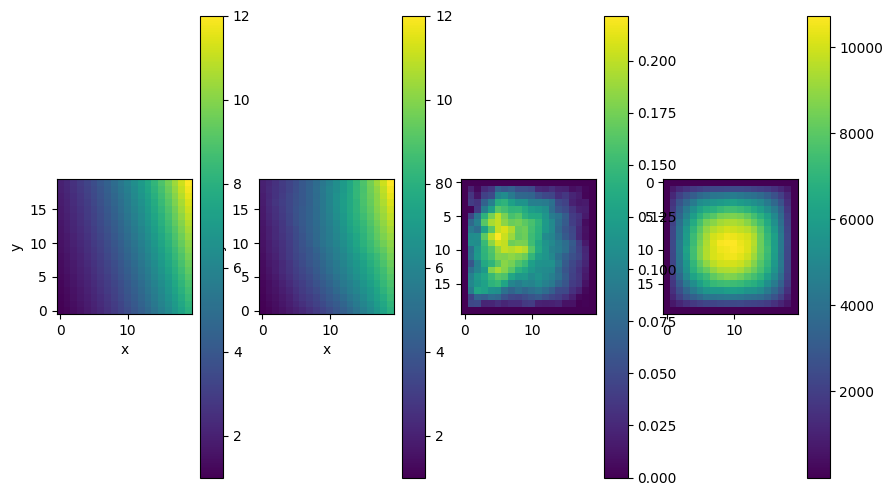

In [ ]:
# plot solution
fig, ( ax1, ax2, ax3, ax4, ) = plt.subplots( 1, 4, figsize=(10,6), )

opts = {
  'vmin': 1.,
  'vmax': 12.,
  'origin': 'lower',
}

for ax in [ ax1, ax2, ]:
  ax.set_xlabel('x')
  ax.set_ylabel('y')

im1 = ax1.imshow( phi_exact, ** opts )
im2 = ax2.imshow( phi, ** opts )
im3 = ax3.imshow( res, )
im4 = ax4.imshow( ws, )

fig.colorbar( im1, )
fig.colorbar( im2, )
fig.colorbar( im3, )
fig.colorbar( im4, )

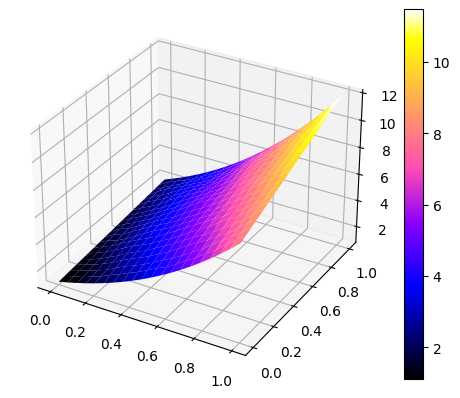

In [ ]:
# plot 3D surface
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface( domain.mx, domain.my, phi, cmap=cm.gnuplot2, )
fig.colorbar( surf, )

## Transporte de radiación como proceso estocástico

## Término fuente

## Trazado de rayos

## Modelado de eventos de colisión

## La ecuación de Boltzmann